In [1]:
from kafka import KafkaConsumer
import json
import matplotlib.pyplot as plt
import time

In [2]:
# Initialize data storage for plotting
data = { '0': [[],[],[],[]], '1': [[],[],[],[]], '2': [[],[],[],[]], '3': [[],[],[],[]], '4': [[],[],[],[]],
            '5': [[],[],[],[]], '6': [[],[],[],[]] }

In [3]:
# Kafka configuration
def initialize_consumer():
    kafka_topic = "water_quality_predictions"
    kafka_bootstrap_servers = ["localhost:9092"]

    # Create Kafka consumer
    consumer = KafkaConsumer(
        kafka_topic,
        bootstrap_servers=kafka_bootstrap_servers,
        value_deserializer=lambda m: json.loads(m.decode('utf-8')),
        auto_offset_reset='latest',
        enable_auto_commit=True
    )
    return consumer

In [4]:
# Receive all published messages and update plot
def update_plot(consumer):
    try:
        for message in consumer:
            # Parse the message
            pred_data = message.value
            sensor_key = str(int(message.key))
            print(f"Received: {pred_data}")

            # Update data storage
            data[sensor_key][0].append(pred_data['prediction'])
            data[sensor_key][1].append(pred_data['prediction_probabilities'][0][0])
            data[sensor_key][2].append(pred_data['prediction_probabilities'][0][1])
            data[sensor_key][3].append(pred_data['timestamp'])

            # Keep only the last 100 entries for plotting
            if len(data[sensor_key][3]) > 100:
                data[sensor_key][0].pop(0)
                data[sensor_key][1].pop(0)
                data[sensor_key][2].pop(0)
                data[sensor_key][3].pop(0)

            # Clear the current axes and redraw the plots
            plt.figure(figsize=(10, 8))

            plt.subplot(2, 2, 1)
            plt.plot(data[sensor_key][3], data[sensor_key][0], label="Overall prediction", color="blue")
            plt.title("Overall prediction")
            plt.ylabel("Value")

            plt.subplot(2, 2, 2)
            plt.plot(data[sensor_key][3], data[sensor_key][1], label="Probability", color="green")
            plt.title("Probability Class 0")
            plt.ylabel("Prob.")

            plt.subplot(2, 2, 3)
            plt.plot(data[sensor_key][3], data[sensor_key][2], label="Probability", color="orange")
            plt.title("Probability Class 1")
            plt.ylabel("Prob.")

            plt.tight_layout()

            # Save the plot as an image
            plt.savefig(f"water_quality_predictions_{sensor_key}.png")
            plt.close()

            break  # Process one message at a time
    except KeyboardInterrupt:
        print("Stopped consuming messages.")
        consumer.close()

Subscribed to Kafka topic 'water_quality'.
Received: {'prediction': [1], 'prediction_probabilities': [[0.0, 1.0]], 'timestamp': 1741192849}
Received: {'prediction': [0], 'prediction_probabilities': [[1.0, 0.0]], 'timestamp': 1741192850}
Received: {'prediction': [0], 'prediction_probabilities': [[1.0, 0.0]], 'timestamp': 1741192851}
Received: {'prediction': [0], 'prediction_probabilities': [[1.0, 0.0]], 'timestamp': 1741192852}
Received: {'prediction': [0], 'prediction_probabilities': [[1.0, 0.0]], 'timestamp': 1741192853}
Received: {'prediction': [1], 'prediction_probabilities': [[0.0, 1.0]], 'timestamp': 1741192854}
Received: {'prediction': [1], 'prediction_probabilities': [[0.0, 1.0]], 'timestamp': 1741192855}
Received: {'prediction': [0], 'prediction_probabilities': [[1.0, 0.0]], 'timestamp': 1741192856}
Received: {'prediction': [0], 'prediction_probabilities': [[1.0, 0.0]], 'timestamp': 1741192857}
Received: {'prediction': [0], 'prediction_probabilities': [[0.8, 0.2]], 'timestamp':

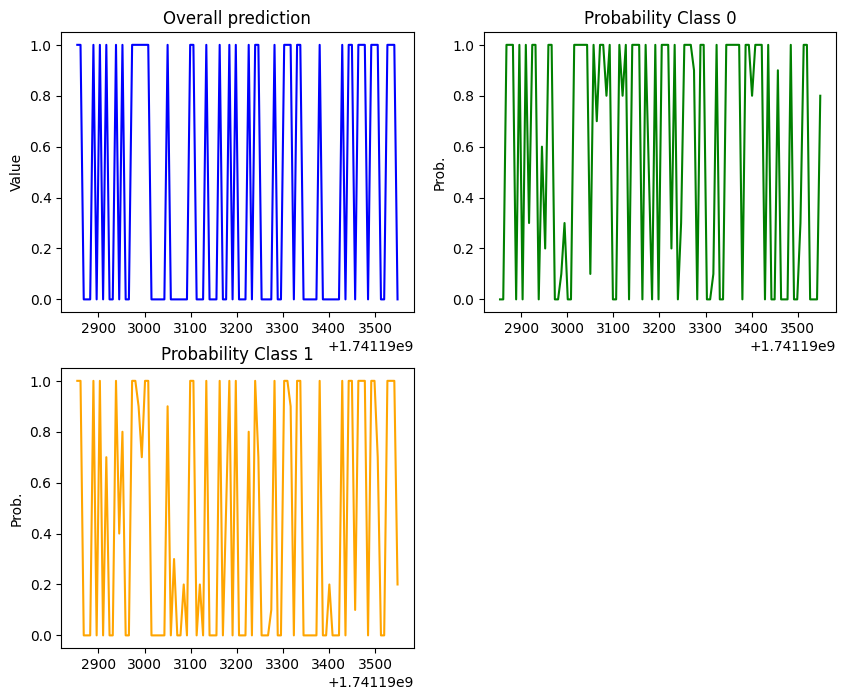

In [5]:
consumer = initialize_consumer()
print("Subscribed to Kafka topic 'water_quality'.")

try:
    while True:
        update_plot(consumer)
except KeyboardInterrupt:
    print("Stopped visualization.")
    consumer.close()